<a href="https://colab.research.google.com/github/Jay5852/100-days-machine-learning-daily-practice/blob/main/D29_FunctionTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [ ]:
df.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [ ]:
# df['Age'].fillna(df['Age'].mean(),inplace = True)
df.fillna({'Age':df['Age'].mean()},inplace=True)

In [ ]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [ ]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [ ]:
X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
#Train test split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 42)

In [ ]:
X_train.shape

(712, 2)

In [ ]:
X_test.shape

(179, 2)

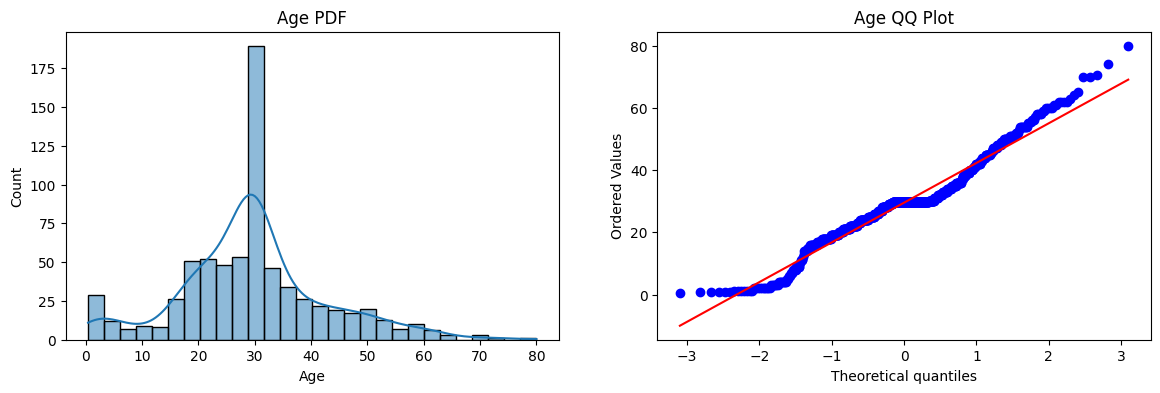

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist ="norm", plot= plt)
plt.title('Age QQ Plot')

plt.show()

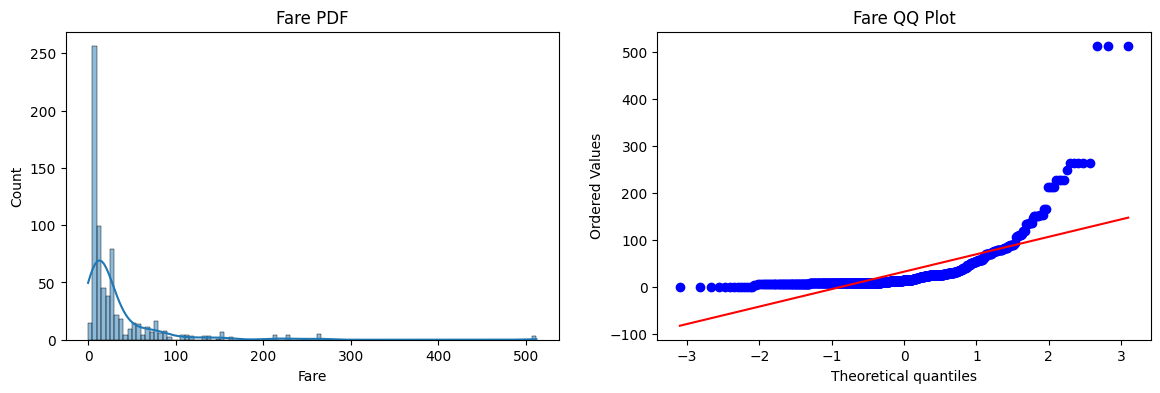

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist ="norm", plot= plt)
plt.title('Fare QQ Plot')

plt.show()

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [ ]:
print("Accuracy LR", accuracy_score(y_test,y_pred)*100)
print("Accuracy DT", accuracy_score(y_test,y_pred2)*100)

Accuracy LR 64.80446927374301
Accuracy DT 67.0391061452514


In [ ]:
log_trf = FunctionTransformer(np.log1p)

In [ ]:
X_train_transformed = log_trf.fit_transform(X_train)
X_test_transformed = log_trf.fit_transform(X_test)

In [ ]:
# X_train_transformed
X_test_transformed.head()

,Age,Fare
709,3.424234,2.787834
439,3.465736,2.442347
840,3.044522,2.188856
720,1.945910,3.526361
39,2.708050,2.504848


In [ ]:
clf3 = LogisticRegression()
clf4 = DecisionTreeClassifier()

In [ ]:
clf3.fit(X_train_transformed,y_train)
clf4.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred3 = clf3.predict(X_test_transformed)
y_pred4 = clf4.predict(X_test_transformed)

In [ ]:
print("Accuracy LR after log_transform  ", accuracy_score(y_test,y_pred3)*100)
print("Accuracy DT after log_transform  ", accuracy_score(y_test,y_pred4)*100)

Accuracy LR after log_transform   68.15642458100558
Accuracy DT after log_transform   66.4804469273743


In [ ]:
X_transformed = log_trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6599750312109863


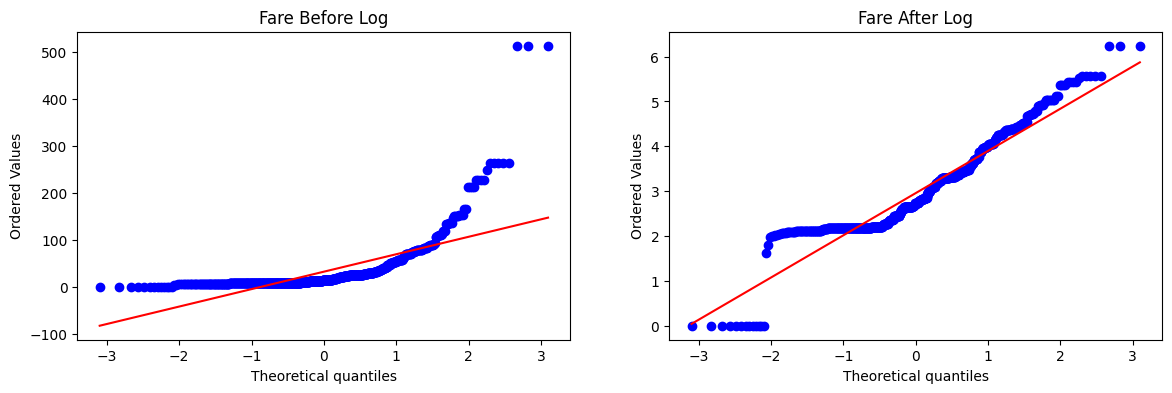

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

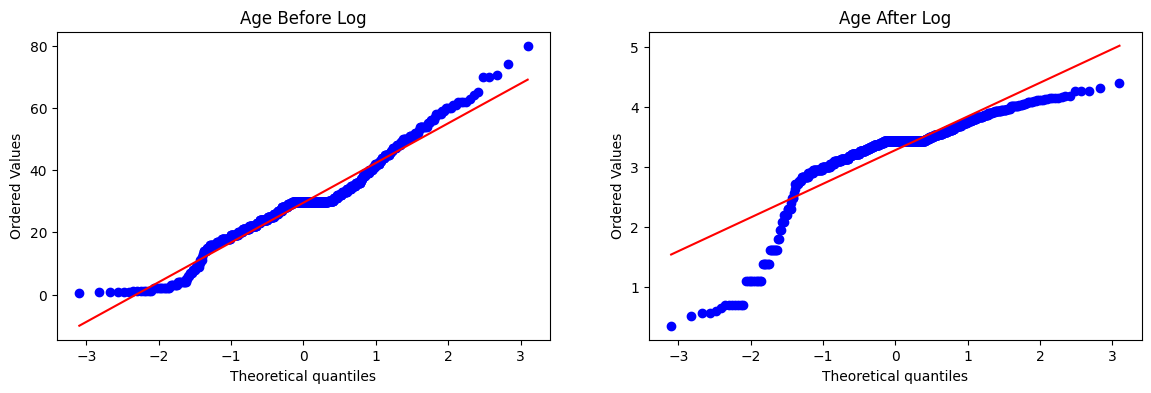

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [ ]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6703910614525139


In [ ]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6599500624219725


In [ ]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6195131086142323


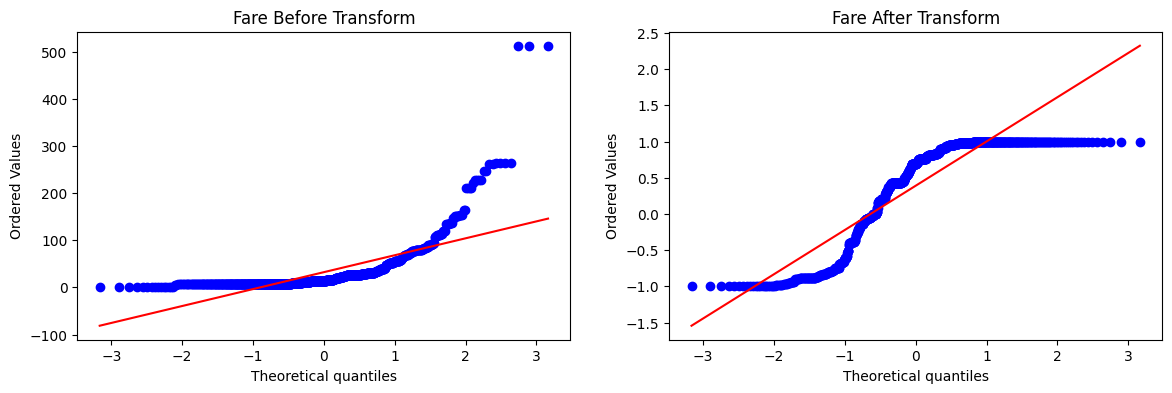

In [ ]:
apply_transform(np.sin)